# 평가

In [1]:
# 머신러닝 = 데이터 가공/변환, 모델 학습/예측, 평가

# 회귀의 성능 평가지표 = MAE(오차에 절댓값을 씌운 후 평균 오차 구하기)
#                      = RMSE(오차의 제곱 값에 루트를 씌운 뒤 평균 오차 구하기)

In [2]:
# 분류의 성능 평가지표 = 정확도, 오차행렬, 정밀도, 재현율, F1 스코어, ROC AUC

## 01 정확도(Accuracy)

In [3]:
# 정확도 = 예측 결과가 동일한 데이터 건수 / 전체 예측 데이터 건수

In [1]:
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    # fit() 메서드는 아무것도 학습하지 않음.
    def fit(self, x,y=None):
        pass
    # predict() 메서드는 단순히 Sex 피처가 1이면 0 , 그렇지 않으면 1로 예측함.
    def predict(self, x):
        pred =np.zeros((x.shape[0],1))
        for i in range (x.shape[0]):
            if x['Sex'].iloc[i] ==1:
                pred[i] =0
            else :
                pred[i]=1
                

        return pred

In [2]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [3]:
# NUll 처리함수 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace= True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df=pd.read_csv(r'C:\Users\dudco\Desktop\파이썬스터디\파이썬 머신러닝 완벽가이드\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용해 학습/예측/평가 수행.
myclf = MyDummyClassifier()
myclf.fit(x_train, y_train)

mypredictions = myclf.predict(x_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test, mypredictions)))

Dummy Classifier의 정확도는: 0.7877


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self, x, y):
        pass
    
    # 입력값으로 들어오는 x 데이터 세트의 크기만큼 모두 0값으로 만들어서 변환
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

# 사이킷런의 내장 데이터 세트인 load_digits() 를 이용해 MNIST 데이터 로딩
digits = load_digits()

# digits 번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환.
y = (digits.target==7).astype(int)
x_train, x_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [6]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 므기 :', y_test.shape)
print('테스트 세트 레이블 0과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakelf = MyFakeClassifier()
fakelf.fit(x_train, y_train)
fakepred = fakelf.predict(x_test)
print('모든 예측을 0으로 하여도 정확도는: {:.3f}'.format(accuracy_score(y_test, fakepred)))

레이블 테스트 므기 : (450,)
테스트 세트 레이블 0과 1의 분포도
0    405
1     45
dtype: int64
모든 예측을 0으로 하여도 정확도는: 0.900


## 02 오차행렬

In [7]:
# TN : 예측값 0으로 예측, 실제 값 0
# FP : 예측값 1로 예측, 실제값 0
# FN : 예측값 0 으로 예측, 실제값 1
# TP :예측값 1로 예측, 실제값 1

In [8]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fakepred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

In [9]:
# 정확도 : (TN + TP) / (TN + FP + FN + TP)

## 03 정밀도와 재현율

In [10]:
# 정밀도 : TP / (FP + TP)
# 재현율 : TP / (FN + TP)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도 :{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습 데이터/테스트 데이터 분할.
titanic_df=pd.read_csv(r'C:\Users\dudco\Desktop\파이썬스터디\파이썬 머신러닝 완벽가이드\titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)
x_titanic_df = transform_features(x_titanic_df)

x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(x_train, y_train)
pred = lr_clf.predict(x_test)
get_clf_eval(y_test, pred)

오차행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492, 정밀도:0.7742, 재현율:0.7869


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
pred_proba = lr_clf.predict_proba(x_test)
pred = lr_clf.predict(x_test)
print('pred_proba()결과 shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

# 예측 확률 array와 예측 결과값 array를 병합(concatenate)해 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두 개의 class 중에서 더 튼 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])

pred_proba()결과 shape : (179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.4616653  0.5383347 ]
 [0.87862763 0.12137237]
 [0.87727002 0.12272998]]
두 개의 class 중에서 더 튼 확률을 클래스 값으로 예측 
 [[0.4616653  0.5383347  1.        ]
 [0.87862763 0.12137237 0.        ]
 [0.87727002 0.12272998 0.        ]]


In [14]:
from sklearn.preprocessing import Binarizer

X = [[1, -1, 2],
    [2, 0, 0],
    [0, 1.1, 1.2]]

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [15]:
from sklearn.preprocessing import Binarizer

# Binarizer의 threshold 설정값. 분류 결정 임곗값임.
custom_threshold = 0.5

# predict_proba() 반환값의 두번째 칼럼, 즉 positive 클래스 칼럼 하나만 추출해 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492, 정밀도:0.7742, 재현율:0.7869


In [16]:
# Binarizer의 threshold 설정값을 0.4로 설정. 즉 분류 결정 임곗값을 0.5에서 0.4로 낮춤
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[99 19]
 [10 51]]
정확도 :0.8380, 정밀도:0.7286, 재현율:0.8361


In [17]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장.
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 :',custom_threshold)
        get_clf_eval(y_test, custom_predict)
        

get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds )

임곗값 : 0.4
오차행렬
[[99 19]
 [10 51]]
정확도 :0.8380, 정밀도:0.7286, 재현율:0.8361
임곗값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도 :0.8492, 정밀도:0.7656, 재현율:0.8033
임곗값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도 :0.8492, 정밀도:0.7742, 재현율:0.7869
임곗값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도 :0.8659, 정밀도:0.8364, 재현율:0.7541
임곗값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도 :0.8771, 정밀도:0.8824, 재현율:0.7377


In [18]:
from sklearn.metrics import precision_recall_curve

# 레입ㄹ 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

# 실제값 데이터 세트와 레이블 값이 1일때의 예측확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1)
print('반환된 분류 결정 임곗값 배열의 shape:', thresholds.shape)

# 반환된 임곗값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 step으로 추출.
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값
print('샘플 임계값별 정밀도:', np.round(precisions[thr_index],3))
print('샘플 임계값별 재현율:', np.round(recalls[thr_index],3))

반환된 분류 결정 임곗값 배열의 shape: (143,)
샘플 추출을 위한 임계값 배열의 index 10개: [  0  15  30  45  60  75  90 105 120 135]
샘플용 10개의 임곗값: [0.1  0.12 0.14 0.19 0.28 0.4  0.57 0.67 0.82 0.95]
샘플 임계값별 정밀도: [0.389 0.44  0.466 0.539 0.647 0.729 0.836 0.949 0.958 1.   ]
샘플 임계값별 재현율: [1.    0.967 0.902 0.902 0.902 0.836 0.754 0.607 0.377 0.148]


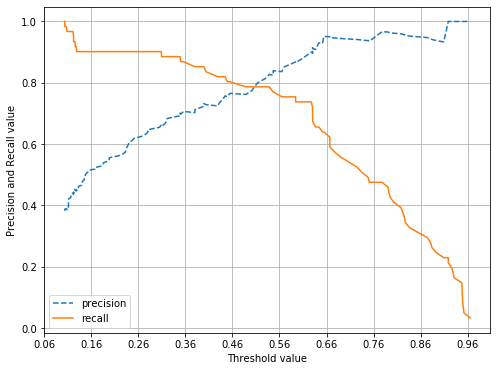

In [19]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test, pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # x축을 threshold값으로, y축른 정밀도, 재현율 값으로 각각 plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 x축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축. y축 label과 legend, 그리고 grid설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot(y_test, lr_clf.predict_proba(x_test)[:,1])

## 04 F1 스코어

In [20]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, pred)
print('F1 스코어: {0:.4f}'.format(f1))

F1 스코어: 0.7805


In [21]:
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    # F1 스코어 추가
    f1 = f1_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))
          

thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값 : 0.4
오차행렬
[[99 19]
 [10 51]]
정확도:0.8380, 정밀도:0.7286, 재현율:0.8361, F1:0.7786
임곗값 : 0.45
오차행렬
[[103  15]
 [ 12  49]]
정확도:0.8492, 정밀도:0.7656, 재현율:0.8033, F1:0.7840
임곗값 : 0.5
오차행렬
[[104  14]
 [ 13  48]]
정확도:0.8492, 정밀도:0.7742, 재현율:0.7869, F1:0.7805
임곗값 : 0.55
오차행렬
[[109   9]
 [ 15  46]]
정확도:0.8659, 정밀도:0.8364, 재현율:0.7541, F1:0.7931
임곗값 : 0.6
오차행렬
[[112   6]
 [ 16  45]]
정확도:0.8771, 정밀도:0.8824, 재현율:0.7377, F1:0.8036


## 05 ROC 곡선과 AUC

In [22]:
from sklearn.metrics import roc_curve

# 레입ㄹ 값이 1일 때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(x_test)[:,1]

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 step으로 추출.
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작
thr_index = np.arange(1, thresholds.shape[0],5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:',thr_index)
print('샘플용 10개의 임곗값:',np.round(thresholds[thr_index],2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR:', np.round(fprs[thr_index],3))
print('샘플 임곗값멸 TPR:', np.round(tprs[thr_index],3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 1  6 11 16 21 26 31 36 41 46 51]
샘플용 10개의 임곗값: [0.97 0.65 0.63 0.57 0.45 0.38 0.31 0.13 0.12 0.11 0.1 ]
샘플 임곗값별 FPR: [0.    0.017 0.034 0.076 0.127 0.186 0.237 0.576 0.619 0.754 0.814]
샘플 임곗값멸 TPR: [0.033 0.639 0.705 0.754 0.803 0.852 0.902 0.902 0.951 0.967 1.   ]


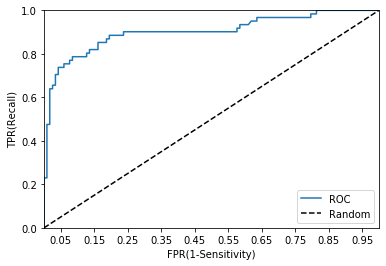

In [23]:
def roc_curve_plot(y_test, pred_proba_c1):
    # 임곗값에 따른 FPR. TPR 값을 반환받음
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 그래프 곡선으로 그림
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선을 그림
    plt.plot([0,1],[0,1],'k--',label='Random')
    
    # FPR x축의 scale을 0.1 단위로 변경, x,y축 명 설정 등
    start, end= plt.xlim()
    plt.xticks(np.round(np.arange(start, end,0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    plt.xlabel('FPR(1-Sensitivity)');plt.ylabel('TPR(Recall)')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba[:,1])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix( y_test, pred))
print("정확도:",np.round(accuracy_score( y_test, pred),4))
print("정밀도:",np.round(precision_score( y_test, pred),4))
print("재현율:",np.round(recall_score( y_test, pred),4))

[[104  14]
 [ 13  48]]
정확도: 0.8492
정밀도: 0.7742
재현율: 0.7869


In [88]:
def get_clf_eval(y_test, pred= None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f},\F1:{3:.4f},AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

## 06 피마 인디언 당뇨병 예측